In [13]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [14]:
# The very first thing to do is to connect the colab file to our drive were we have the dataset downloaded in a .zip file
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


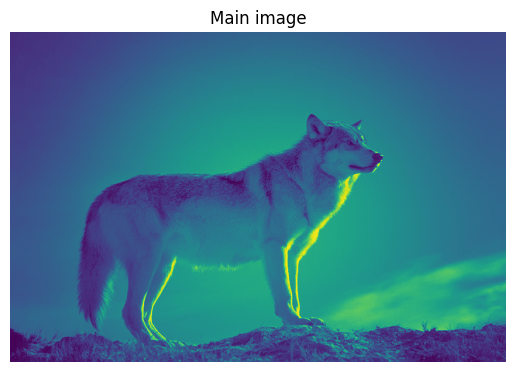

In [15]:
# Load the main image and the template image
main_image_path = '/content/drive/My Drive/Pklotdataset/main_image.jpg'
tempalte_image_path = '/content/drive/My Drive/Pklotdataset/template.jpg'


main_image = cv.imread(main_image_path, cv.IMREAD_GRAYSCALE)
template = cv.imread(tempalte_image_path, cv.IMREAD_GRAYSCALE)

plt.imshow(main_image)
plt.axis('off')
plt.title('Main image')
plt.show()

(101, 121)


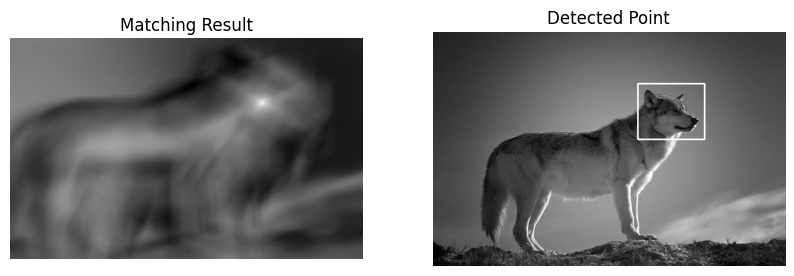

In [16]:

# Get the dimensions of the template
template_height, template_width = template.shape
print(template.shape)

# Perform template matching using normalized cross-correlation
result = cv.matchTemplate(main_image, template, cv.TM_CCOEFF_NORMED)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Draw a rectangle around the matched region
top_left = max_loc
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv.rectangle(main_image, top_left, bottom_right, 255, 2)   # to draw the rectangle

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(result, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(122), plt.imshow(main_image, cmap='gray')
plt.title('Detected Point'), plt.axis('off')
plt.show()
